In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.basemap import Basemap

In [3]:
dataset = pd.read_pickle('headline_ex3.pkl')

In [4]:
US_dataset = dataset[dataset['countrycode'] == 'US' ]

In [5]:
World_dataset = dataset[dataset['countrycode'] != 'US']

In [6]:
US_dataset

,headline,city,latitude,longitude,countrycode,K-Mean_label,DBSCAN_label
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,1,0
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,1,0
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,1,0
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,1,0
6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US,1,0
...,...,...,...,...,...,...,...
637,Dengue Outbreak in Easton,Easton,38.77428,-76.07633,US,1,0
640,Authorities are Worried about the Spread of Va...,Clovis,36.82523,-119.70292,US,1,0
641,More Zika patients reported in Fort Worth,Fort Worth,32.72541,-97.32085,US,1,0
642,Zika symptoms spotted in Boynton Beach,Boynton Beach,26.52535,-80.06643,US,1,0


In [7]:
US_dataset = US_dataset.drop(columns=['K-Mean_label', 'DBSCAN_label'])
World_dataset = World_dataset.drop(columns=['K-Mean_label', 'DBSCAN_label'])

In [8]:
def elbow_method(data):
    k_value = range(1,10) 
    inertia_val = [KMeans(k).fit(data[['latitude','longitude']]).inertia_ for k in k_value]
    plt.plot(k_value, inertia_val )
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()    
    

In [9]:
from math import cos, sin, asin

def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y2
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2),
                                                   sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

In [10]:
def clustering_and_visualize(data,n):
    k_mean_position_cluster = KMeans(n_clusters = n).fit(data[['latitude','longitude']])
    centroids = k_mean_position_cluster.cluster_centers_
    print(centroids)
    #print(centroids)
    #plt.scatter(data_set['latitude'],data_set['longitude'],c = k_mean_position_cluster.labels_.astype(float),s = 50 , alpha = 0.5)
    #plt.scatter(centroids[:,0],centroids[:,1],c = 'red', s = 50)
    #plt.show()
    #a = range(len(centroid))
    centroid_list = [[i,j[0],j[1]] for i,j in enumerate(centroids)]
    
    Centroid_df = pd.DataFrame(centroid_list,columns=["Cluster", "Cluster_Latitude","Cluster_Longtitude"])
    
    
    data['Cluster'] = k_mean_position_cluster.labels_
    
    data = data.merge(Centroid_df,how='left',on="Cluster")
    data['Centroid_Length'] = np.vectorize(great_circle_distance)(data['longitude'], data['latitude'], data['Cluster_Longtitude'], data['Cluster_Latitude'])
    fig = plt.figure(figsize=(12, 8))
    map_plotter = Basemap()
    map_plotter.scatter(data['longitude'],data['latitude'], latlon=True,c=k_mean_position_cluster.labels_.astype(float))
    map_plotter.scatter(centroids[:,1],centroids[:,0],c = 'red', s = 60)
    map_plotter.shadedrelief()
    plt.show()
    
    return data

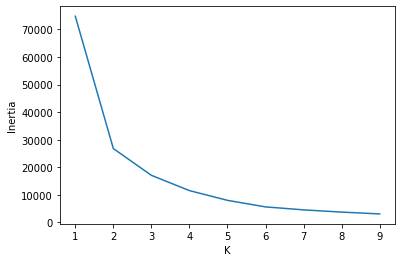

In [11]:
elbow_method(US_dataset)

[[  37.04725466  -93.25711045]
 [  36.50629771 -118.91299083]
 [  34.96685534  -78.75703183]]


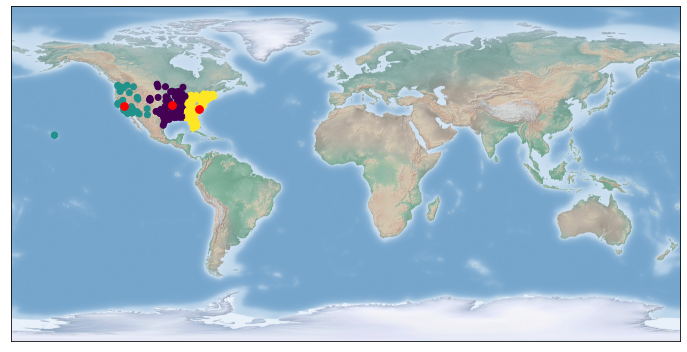

In [12]:
US_data_cluster = clustering_and_visualize(US_dataset,3)

In [13]:
US_data_cluster

,headline,city,latitude,longitude,countrycode,Cluster,Cluster_Latitude,Cluster_Longtitude,Centroid_Length
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,2,34.966855,-78.757032,1.436628
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,2,34.966855,-78.757032,1.532123
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,2,34.966855,-78.757032,1.373018
3,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,0,37.047255,-93.257110,2.733626
4,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US,0,37.047255,-93.257110,2.106160
...,...,...,...,...,...,...,...,...,...
262,Dengue Outbreak in Easton,Easton,38.77428,-76.07633,US,2,34.966855,-78.757032,2.680702
263,Authorities are Worried about the Spread of Va...,Clovis,36.82523,-119.70292,US,1,36.506298,-118.912991,0.789929
264,More Zika patients reported in Fort Worth,Fort Worth,32.72541,-97.32085,US,0,37.047255,-93.257110,2.219446
265,Zika symptoms spotted in Boynton Beach,Boynton Beach,26.52535,-80.06643,US,2,34.966855,-78.757032,1.309398


In [31]:
US_group = US_data_cluster.groupby(['Cluster'])

In [35]:
US_group.first()

headline  \
Cluster Centroid_Length                                                      
0       0.095510           Northfield Encounters Severe Symptoms of Herpes   
        0.099475         More Patients in Crawfordsville are Getting Di...   
        0.189485                  Nashville takes precautions against Zika   
        0.192844                             Zika case reported in Abilene   
        0.206316                                  Rabies Outbreak in Altus   
...                                                                    ...   
2       3.024598                         Zika symtomps spotted in Key West   
        3.083558                 More Zika patients reported in Fort Myers   
        3.090417                   More Zika patients reported in Lakeland   
        3.092132         Scranton authorities confirmed the spread of G...   
        3.120828                              Outbreak of Zika in Leesburg   

                                   city  latitude  longitude countrycode  \
Cluster Centroid_Length                                                    
0       0.095510             Northfield  44.45830  -93.16160          US   
        0.099475         Crawfordsville  40.04115  -86.87445          US   
        0.189485              Nashville  36.16589  -86.78444          US   
        0.192844                Abilene  32.44874  -99.73314          US   
        0.206316                  Altus  34.63813  -99.33398          US   
...                                 ...       ...        ...         ...   
2       3.024598               Key West  24.55524  -81.78163          US   
        3.083558             Fort Myers  26.62168  -81.84059          US   
        3.090417               Lakeland  28.03947  -81.94980          US   
        3.092132               Scranton  41.40916  -75.66490          US   
        3.120828               Leesburg  28.81082  -81.87786          US   

                         Cluster_Latitude  Cluster_Longtitude  
Cluster Centroid_Length                                        
0       0.095510                37.047255          -93.257110  
        0.099475                37.047255          -93.257110  
        0.189485                37.047255          -93.257110  
        0.192844                37.047255          -93.257110  
        0.206316                37.047255          -93.257110  
...                                   ...                 ...  
2       3.024598                34.966855          -78.757032  
        3.083558                34.966855          -78.757032  
        3.090417                34.966855          -78.757032  
        3.092132                34.966855          -78.757032  
        3.120828                34.966855          -78.757032  

[258 rows x 7 columns]

In [42]:
US_Cluster_Sorted =US_data_cluster.groupby('Cluster').apply(pd.DataFrame.sort_values, 'Centroid_Length',ascending=False)

In [57]:
US_Cluster_Sorted_top = US_data_cluster.sort_values('Centroid_Length',ascending=True).groupby('Cluster').first()

In [53]:
US_Cluster_Sorted_top

,headline,city,latitude,longitude,countrycode,Cluster_Latitude,Cluster_Longtitude,Centroid_Length
Cluster,,,,,,,,
0,Northfield Encounters Severe Symptoms of Herpes,Northfield,44.45830,-93.16160,US,37.047255,-93.257110,0.095510
1,Rhinovirus Hits Bakersfield,Bakersfield,35.37329,-119.01871,US,36.506298,-118.912991,0.105719
2,More Zika patients reported in Carrollton,Carrollton,33.58011,-85.07661,US,34.966855,-78.757032,0.036393


In [16]:
a = US_data_cluster['Cluster'].value_counts()

In [54]:
US_Cluster_Sorted_test = US_data_cluster.sort_values('Centroid_Length',ascending=True).groupby('Cluster')

In [56]:
US_Cluster_Sorted_test.head()

,headline,city,latitude,longitude,countrycode,Cluster,Cluster_Latitude,Cluster_Longtitude,Centroid_Length
142,More Zika patients reported in Carrollton,Carrollton,33.58011,-85.07661,US,2,34.966855,-78.757032,0.036393
29,First Columbus Zika case,Columbus,32.46098,-84.98771,US,2,34.966855,-78.757032,0.052507
248,Northfield Encounters Severe Symptoms of Herpes,Northfield,44.45830,-93.16160,US,0,37.047255,-93.257110,0.095510
170,More Patients in Crawfordsville are Getting Di...,Crawfordsville,40.04115,-86.87445,US,0,37.047255,-93.257110,0.099475
127,Rhinovirus Hits Bakersfield,Bakersfield,35.37329,-119.01871,US,1,36.506298,-118.912991,0.105719
124,Measles Vaccine is now Required in Wailuku,Wailuku,20.89133,-156.50604,US,1,36.506298,-118.912991,0.106063
58,Will Norovirus vaccine help Raleigh?,Raleigh,35.77210,-78.63861,US,2,34.966855,-78.757032,0.118422
27,El Paso fighting Zika,El Paso,31.75872,-106.48693,US,1,36.506298,-118.912991,0.140310
17,Zika virus reported in Cleveland,Cleveland,35.15952,-84.87661,US,2,34.966855,-78.757032,0.163607
205,New medicine wipes out HIV in Kihei,Kīhei,20.76462,-156.44578,US,1,36.506298,-118.912991,0.166323


In [18]:
US_group = US_data_cluster.groupby('Cluster')['Centroid_Length'].nlargest()

In [26]:
US_group

Cluster     
0        255    3.075055
         7      3.059220
         177    3.042216
         56     2.968626
         174    2.947830
1        244    3.115376
         190    3.053156
         254    2.935306
         184    2.925096
         128    2.923426
2        204    3.120828
         159    3.092132
         221    3.090417
         149    3.083558
         19     3.024598
Name: Centroid_Length, dtype: float64

In [29]:
b = pd.DataFrame({'count' : US_data_cluster.groupby( [ "Cluster", "Centroid_Length"] ).size()}).reset_index()

In [30]:
b

,Cluster,Centroid_Length,count
0,0,0.095510,1
1,0,0.099475,1
2,0,0.189485,1
3,0,0.192844,1
4,0,0.206316,1
...,...,...,...
253,2,3.024598,1
254,2,3.083558,1
255,2,3.090417,1
256,2,3.092132,1


In [20]:
US_T = US_data_cluster.groupby('Cluster').first()
#US_T.sort_values('Cluster')

In [21]:
US_T

,headline,city,latitude,longitude,countrycode,Cluster_Latitude,Cluster_Longtitude,Centroid_Length
Cluster,,,,,,,,
0,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,37.047255,-93.257110,2.733626
1,New Los Angeles Hairstyle goes Viral,Los Angeles,34.05223,-118.24368,US,36.506298,-118.912991,0.669311
2,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,34.966855,-78.757032,1.436628


In [22]:
US_T.head()

,headline,city,latitude,longitude,countrycode,Cluster_Latitude,Cluster_Longtitude,Centroid_Length
Cluster,,,,,,,,
0,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,37.047255,-93.257110,2.733626
1,New Los Angeles Hairstyle goes Viral,Los Angeles,34.05223,-118.24368,US,36.506298,-118.912991,0.669311
2,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,34.966855,-78.757032,1.436628


In [ ]:
import itertools
combination = list(itertools.combinations(dataframe[column], 2))

In [60]:
print(len(US_Cluster_Sorted_test))

3
